In [ ]:
from riskfolio import RiskFunctions

In [ ]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the function to maximize
def evar(x, alpha, beta):
  return (beta**-1)*((torch.log(torch.mean(torch.exp(-beta * x)))) - (torch.log(1-alpha)))

# Define the variable (parameter) of the function
x = torch.tensor(np.random.normal(0,1,size=10000), requires_grad=False)
alpha = torch.tensor([0.1], requires_grad=False)
beta = torch.tensor([1.0], requires_grad=True)

# Initialize the optimizer (we'll use stochastic gradient descent)
optimizer = optim.SGD([beta], lr=0.01, )


print(evar(x,alpha,beta))

# Number of optimization steps
num_steps = 10000

# Optimization loop
for _ in range(num_steps):
  optimizer.zero_grad()
  output = evar(x, alpha, beta)
  output.backward()
  optimizer.step()


# Print the maximized value of the function
print("Maximized EVaR:", evar(x, alpha, beta).item())
print("Maximized beta:", beta.item())
# print(evar(x,alpha,beta))
evar,beta = RiskFunctions.EVaR_Hist(((-1*x).tolist()),alpha =1-alpha.item())
print("Risk folio evar, beta",evar, beta)

tensor([0.6074], grad_fn=<MulBackward0>)
Maximized EVaR: 0.45568573474884033
Maximized beta: 0.4548013508319855
Risk folio evar, beta 0.46791316703635705 2.183972287746039


In [ ]:
S = 0
S_prime = 0
beta = 1
alpha = 0.1

x = np.random.normal(0,1,size = 1000000)

delta = 0.01
delta2 = 0.001
gamma = 0.0001

for i in range(0,1000000):
  # X = np.random.normal(0,1,size=1)
  X = x[i]
  S = S + delta * (np.exp(-beta * X) - S)

  # S_prime = S_prime + delta * ( X * np.exp( -beta * X ) - S_prime)
  # beta = beta + gamma * (beta**-2) *(np.log(S) + (beta*(S_prime/S)) - np.log(1-alpha))

  S_prime = S_prime + delta2 * (X * np.exp(-beta * X) - (S_prime * beta * np.exp(-beta * X)))
  beta = beta + gamma * ((beta**-2)*np.log(S)+S_prime - (beta**-2)*(np.log(1-alpha)))
  if i % 100000 == 0:
    print(beta)
# print("S",S)
EVAR = (beta**-1) * (np.log(S/(1-alpha)))
x = np.random.normal(0,1,size = 1000)
avg = 0
for X in x:
  avg = avg + np.exp(-beta * X)
# print("avg",avg/1000)
print("EVAR",EVAR)

0.999490983762916
0.4653855907291962
0.46750255506358307
0.456934635740809
0.4579106600815706
0.46022834379462174
0.4667517659212582
0.46195638282860463
0.46372592589267697
0.45565570776171277
EVAR 0.44885776138842554


In [ ]:


# Create the CartPole-v1 environment
env = gym.make('CartPole-v1')

# Define the number of episodes
num_episodes = 100

# Initialize a list to store rewards for each episode
episode_rewards = []

# Run the simulation for a number of episodes
for episode in range(num_episodes):
    observation = env.reset()[0]  # Reset the environment at the start of each episode
    total_reward = 0  # Initialize the total reward for this episode
    terminated  = False
    truncated = False

    while not terminated and not truncated:
        # env.render()  # Render the environment (optional, can be commented out)
        action = env.action_space.sample()  # Take a random action
        observation, reward, terminated, truncated = env.step(action)  # Step the environment

        total_reward += reward  # Accumulate the reward

        # if done:  # Check if the episode is finished
        #     break

    episode_rewards.append(total_reward)  # Store the total reward for this episode

# Close the environment
env.close()

# Print the rewards for each episode
print(episode_rewards)


[19.0, 31.0, 10.0, 17.0, 56.0, 21.0, 32.0, 14.0, 22.0, 12.0, 11.0, 17.0, 20.0, 25.0, 14.0, 16.0, 10.0, 34.0, 17.0, 20.0, 18.0, 13.0, 28.0, 13.0, 22.0, 13.0, 43.0, 15.0, 23.0, 23.0, 12.0, 16.0, 42.0, 13.0, 38.0, 22.0, 10.0, 13.0, 16.0, 13.0, 18.0, 34.0, 41.0, 14.0, 20.0, 12.0, 10.0, 15.0, 19.0, 17.0, 18.0, 13.0, 17.0, 22.0, 42.0, 10.0, 17.0, 19.0, 14.0, 11.0, 36.0, 42.0, 22.0, 28.0, 11.0, 16.0, 15.0, 18.0, 14.0, 26.0, 13.0, 39.0, 26.0, 43.0, 19.0, 12.0, 10.0, 28.0, 15.0, 14.0, 26.0, 16.0, 13.0, 14.0, 18.0, 19.0, 18.0, 31.0, 21.0, 14.0, 25.0, 11.0, 66.0, 19.0, 34.0, 40.0, 18.0, 14.0, 16.0, 21.0]


In [ ]:
def evar(x, alpha, beta):
  return (beta**-1)*(-(torch.log(torch.mean(torch.exp(-beta * x)))) + (torch.log(1-alpha)))

x = -1 * torch.tensor(episode_rewards, requires_grad=False)
alpha = torch.tensor([0.1], requires_grad=False)
beta = torch.tensor([1.0], requires_grad=True)

# Initialize the optimizer (we'll use stochastic gradient descent)
optimizer = optim.SGD([beta], lr=0.001, )


print(evar(x,alpha,beta))

# Number of optimization steps
num_steps = 10000

# Optimization loop
for _ in range(num_steps):
  optimizer.zero_grad()
  output = evar(x, alpha, beta)
  output.backward()
  optimizer.step()


# Print the maximized value of the function
print("Maximized EVaR:", evar(x, alpha, beta).item())
print("Maximized beta:", beta.item())


evar,beta = RiskFunctions.EVaR_Hist(1*np.array(episode_rewards),alpha = alpha)
print(evar, beta)

tensor([-61.5002], grad_fn=<MulBackward0>)
Maximized EVaR: nan
Maximized beta: nan
-10.21770476370568 [[0.64514151]]


In [ ]:
S = 0
S_prime = 0
beta = 1
alpha = 0.1

x = np.array(episode_rewards)

delta = 0.12
# delta2 = 0.1
gamma = 0.0000000003

for i in range(0,len(episode_rewards)):
  # X = np.random.normal(0,1,size=1)
  X = x[i]
  S = S + delta * (np.exp(-beta * X) - S)

  # S_prime = S_prime + delta * ( X * np.exp( -beta * X ) - S_prime)
  # beta = beta + gamma * (beta**-2) *(np.log(S) + (beta*(S_prime/S)) - np.log(1-alpha))

  S_prime = S_prime + delta * (X * np.exp(-beta * X) - (S_prime * beta * np.exp(-beta * X)))
  beta = beta + gamma * ((beta**-2)*np.log(S)+S_prime - (beta**-2)*(np.log(1-alpha)))
  if i % 1000 == 0:
    print(beta)

# print("S",S)
EVAR = (beta**-1) * (np.log(S/(1-alpha)))

# x = np.random.normal(0,1,size = 1000)
# avg = 0
# for X in x:
#   avg = avg + np.exp(-beta * X)
# print("avg",avg/1000)

print("EVAR",EVAR)

0.999999993695529
EVAR -13.453746282151386


<h1>Main Algorithm Starts</h1>

In [1]:
import gym
!pip install riskfolio-lib --quiet
from riskfolio import RiskFunctions
import numpy as np
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
x1={}
x2={}
env = gym.make('CartPole-v1')
episode_rewards = []
alpha = 0.1
for batch in range(0,10):
  x1[batch] = []
  x2[batch] = []

  print("BATCH ",batch,"==================")
  for _ in range(0,20):

    for episode in range(20):
      observation = env.reset()[0]  # Reset the environment at the start of each episode
      total_reward = 0  # Initialize the total reward for this episode
      terminated  = False
      truncated = False

      while not terminated and not truncated:
          # env.render()  # Render the environment (optional, can be commented out)
          action = env.action_space.sample()  # Take a random action
          observation, reward, terminated, truncated = env.step(action)  # Step the environment

          total_reward += reward  # Accumulate the reward

          # if done:  # Check if the episode is finished
          #     break

      episode_rewards.append(total_reward)  # Store the total reward for this episode

    # Close the environment
    # env.close()

      evar,beta = RiskFunctions.EVaR_Hist(1*np.array(episode_rewards),alpha = alpha)

    x1[batch].append(evar)
    print("From func evar, beta : ",evar, beta)


    S = 100
    S_prime = 0
    beta = 1
    alpha = 0.1

    x = np.array(episode_rewards)

    delta = 0.12
    # delta2 = 0.1
    gamma = 0.0000000003

    for i in range(0,len(episode_rewards)):
      # X = np.random.normal(0,1,size=1)
      X = x[i]
      S = S + delta * (np.exp(-beta * X) - S)

      # S_prime = S_prime + delta * ( X * np.exp( -beta * X ) - S_prime)
      # beta = beta + gamma * (beta**-2) *(np.log(S) + (beta*(S_prime/S)) - np.log(1-alpha))

      S_prime = S_prime + delta * (X * np.exp(-beta * X) - (S_prime * beta * np.exp(-beta * X)))
      beta = beta + gamma * ((beta**-2)*np.log(S)+S_prime - (beta**-2)*(np.log(1-alpha)))
      # if i % 1000 == 0:
      #   print(beta)

    # print("S",S)
      EVAR = (beta**-1) * (np.log(S/(1-alpha)))

    x2[batch].append(EVAR)
    # x = np.random.normal(0,1,size = 1000)
    # avg = 0
    # for X in x:
    #   avg = avg + np.exp(-beta * X)
    # print("avg",avg/1000)

    print("EVAR SA",EVAR, beta)



BATCH  0 ==================
From func evar, beta :  -9.43220123760129 [[0.84013869]]
EVAR SA 2.1538645494148745 1.000000020210099
From func evar, beta :  -9.888419564422135 [[0.95129903]]
EVAR SA -0.40280074681116584 1.0000000250811472
From func evar, beta :  -10.108941521151431 [[0.92032633]]
EVAR SA -2.959419972501021 1.0000000146125623
From func evar, beta :  -9.572653408994661 [[0.87520499]]
EVAR SA -5.511966992023999 0.9999999888131849
From func evar, beta :  -9.567627933791153 [[0.91621581]]
EVAR SA -8.035411338728498 0.9999999477447893
From func evar, beta :  -9.622163594526912 [[0.86965261]]
EVAR SA -10.325095116855227 0.9999998918285997
From func evar, beta :  -9.739193520728264 [[0.92402617]]
EVAR SA -12.65147009008233 0.9999998227085184
From func evar, beta :  -9.845883873454255 [[0.97510405]]
EVAR SA -13.578008678423377 0.999999742879367
From func evar, beta :  -9.720135692018939 [[0.91621904]]
EVAR SA -11.312489546136936 0.9999996715431256
From func evar, beta :  -9.795772

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

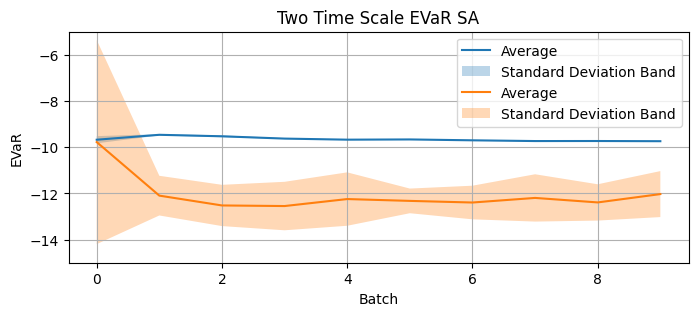

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example dictionary with keys 0 to 4, each containing a sequence of real numbers
# data = {
#     0: [1.2, 2.3, 3.4, 4.5, 5.6],
#     1: [2.1, 3.2, 4.3, 5.4, 6.5],
#     2: [3.0, 4.1, 5.2, 6.3, 7.4],
#     3: [4.1, 5.2, 6.3, 7.4, 8.5],
#     4: [5.2, 6.3, 7.4, 8.5, 9.6]
# }
data = x1
# Calculate average and standard deviation
averages = {}
std_devs = {}

for key, value in data.items():
    averages[key] = np.mean(value)  # Calculate average
    std_devs[key] = np.std(value)  # Calculate standard deviation

# Plotting
plt.figure(figsize=(8, 3))

x = list(data.keys())  # X-axis values (keys)
y = list(averages.values())  # Y-axis values (averages)
std = list(std_devs.values())  # Standard deviations

plt.plot(x, y, label='Average')
plt.fill_between(x, np.subtract(y, std), np.add(y, std), alpha=0.3, label='Standard Deviation Band')




data = x2
# Calculate average and standard deviation
averages = {}
std_devs = {}

for key, value in data.items():
    averages[key] = np.mean(value)  # Calculate average
    std_devs[key] = np.std(value)  # Calculate standard deviation


x = list(data.keys())  # X-axis values (keys)
y = list(averages.values())  # Y-axis values (averages)
std = list(std_devs.values())  # Standard deviations

plt.plot(x, y, label='Average')
plt.fill_between(x, np.subtract(y, std), np.add(y, std), alpha=0.3, label='Standard Deviation Band')

plt.title('Two Time Scale EVaR SA')
plt.ylim(-15,-5)
plt.xlabel('Batch')
plt.ylabel('EVaR')
plt.legend()
plt.grid(True)

